# Initialisation of project

### load libraries
### load csv data into arrays

In [96]:
%matplotlib inline
# notebook
import matplotlib.pylab as pylab
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np
from sklearn.decomposition import PCA

#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [97]:
import csv 
import sys #used for passing in the argument

data = []
with open("./eigg.csv", 'r') as f:  #opens PW file
    reader = csv.reader(f)
    data = list(list(rec) for rec in csv.reader(f, delimiter=',')) #reads csv into a list of lists

print(len(data))
print(len(data[0]))
print(data[0])
print(all([len(i) == len(data[0]) for i in data]))

37389
53
['NBN Atlas record ID', 'Occurrence ID', 'Licence', 'Rightsholder', 'Scientific name', 'Common name', 'Species ID (TVK)', 'Taxon Rank', 'Occurrence status', 'Start date', 'Start date day', 'Start date month', 'Start date year', 'End date', 'End date day', 'End date month', 'End date year', 'Locality', 'OSGR', 'Latitude (WGS84)', 'Longitude (WGS84)', 'Coordinate uncertainty (m)', 'Verbatim depth', 'Recorder', 'Determiner', 'Individual count', 'Abundance', 'Abundance scale', 'Organism scope', 'Organism remarks', 'Sex', 'Life stage', 'Occurrence remarks', 'Identification verification status', 'Basis of record', 'Survey key', 'Dataset name', 'Dataset ID', 'Data provider', 'Data provider ID', 'Institution code', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'OSGR 100km', 'OSGR 10km', 'OSGR 2km', 'OSGR 1km', 'Country', 'State/Province']
True


# Number of records per year

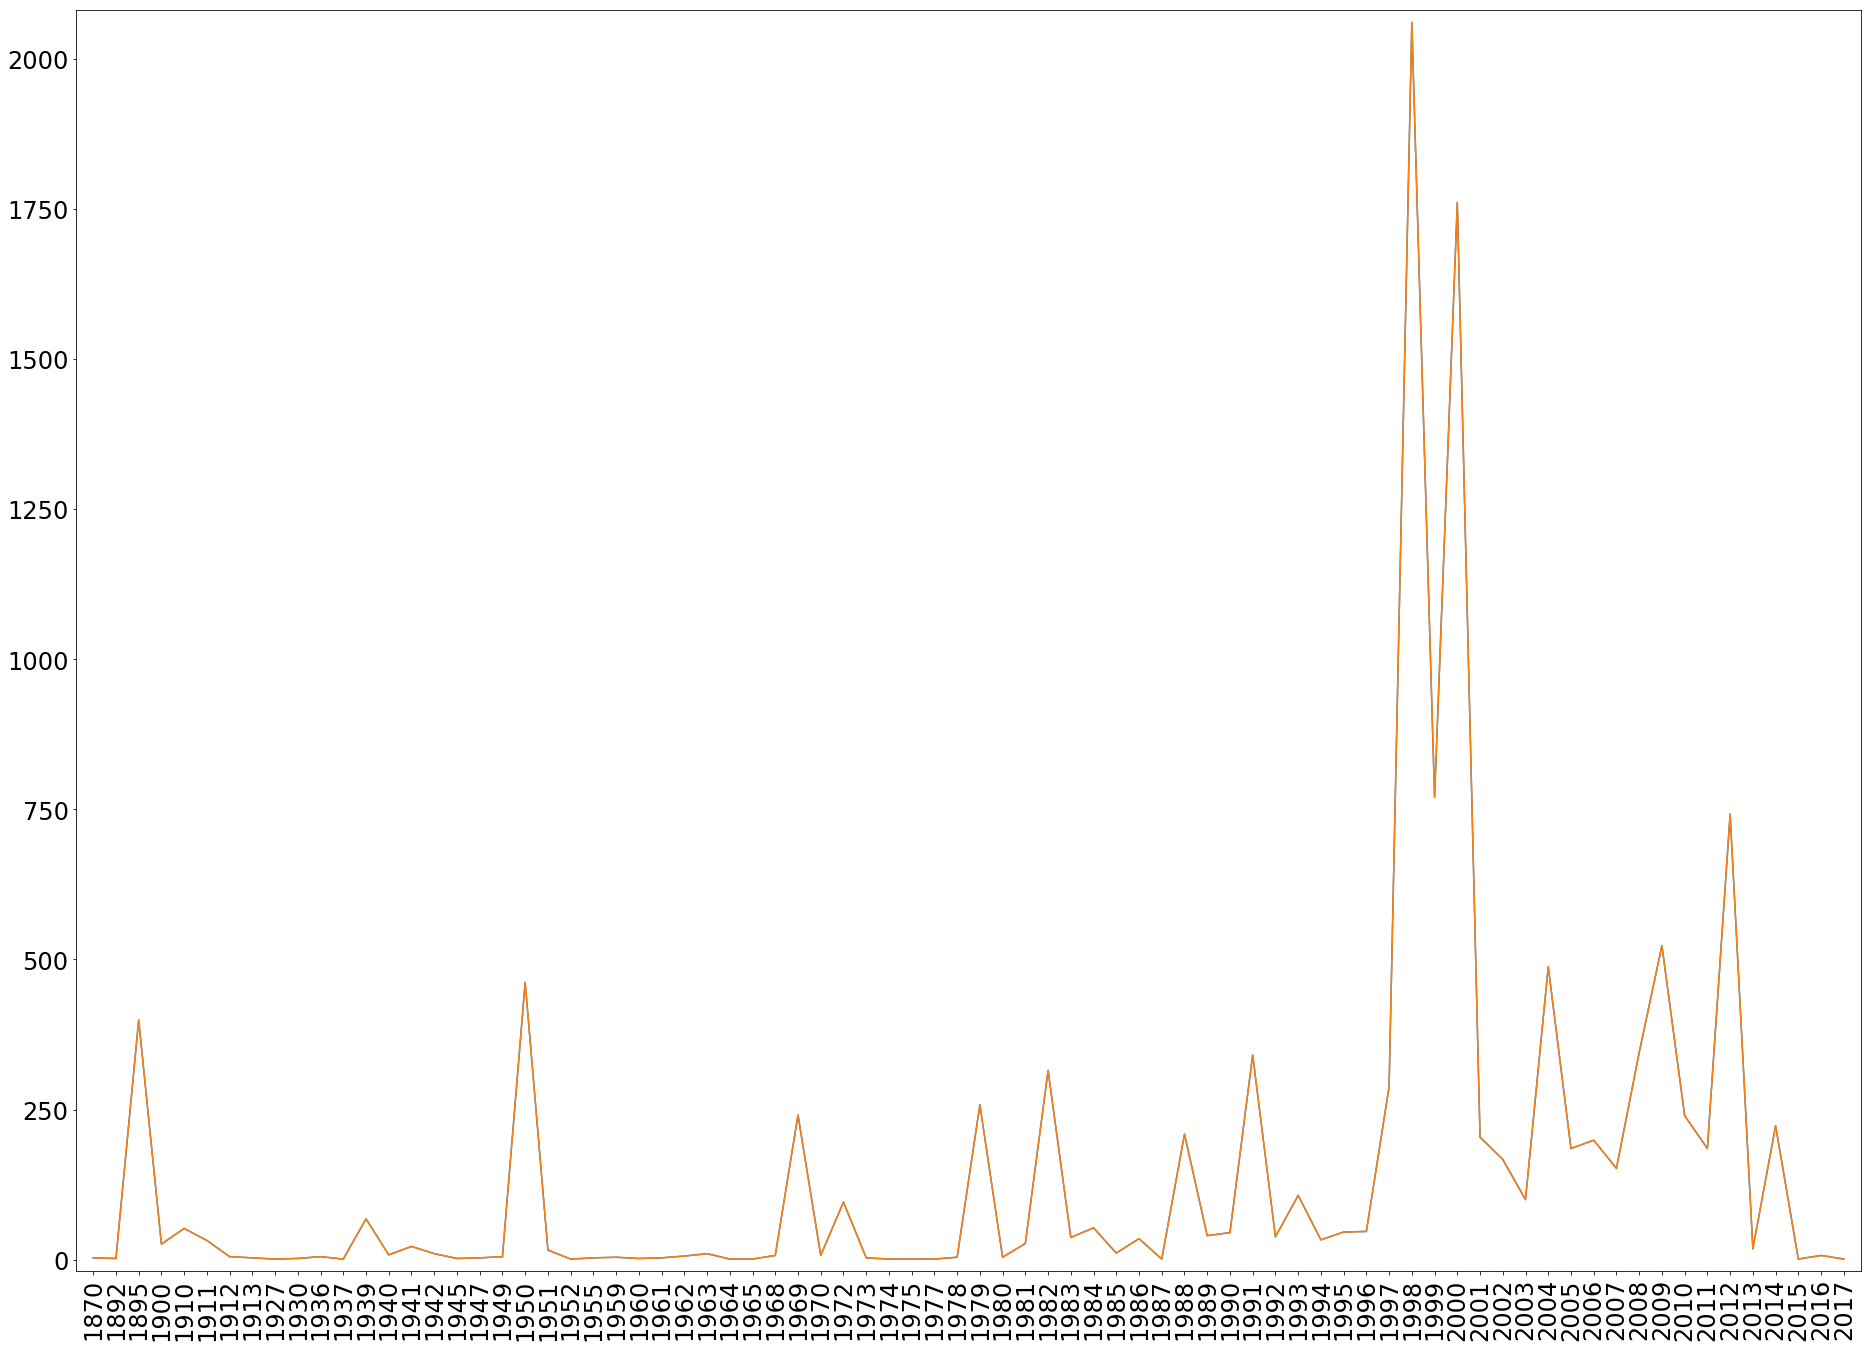

In [98]:
byYear = sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])
byYear = list(filter(lambda x: x[0] != '', byYear))

fig = plt.figure()
plt.plot([x[0] for x in byYear], [x[1] for x in byYear])

x = [x[0] for x in byYear]
y = [x[1] for x in byYear]
plt.plot(x, y)
plt.xticks(x, rotation='vertical')
plt.margins(0.01)
plt.subplots_adjust(bottom=0.15)
plt.show()

# Samples by decade

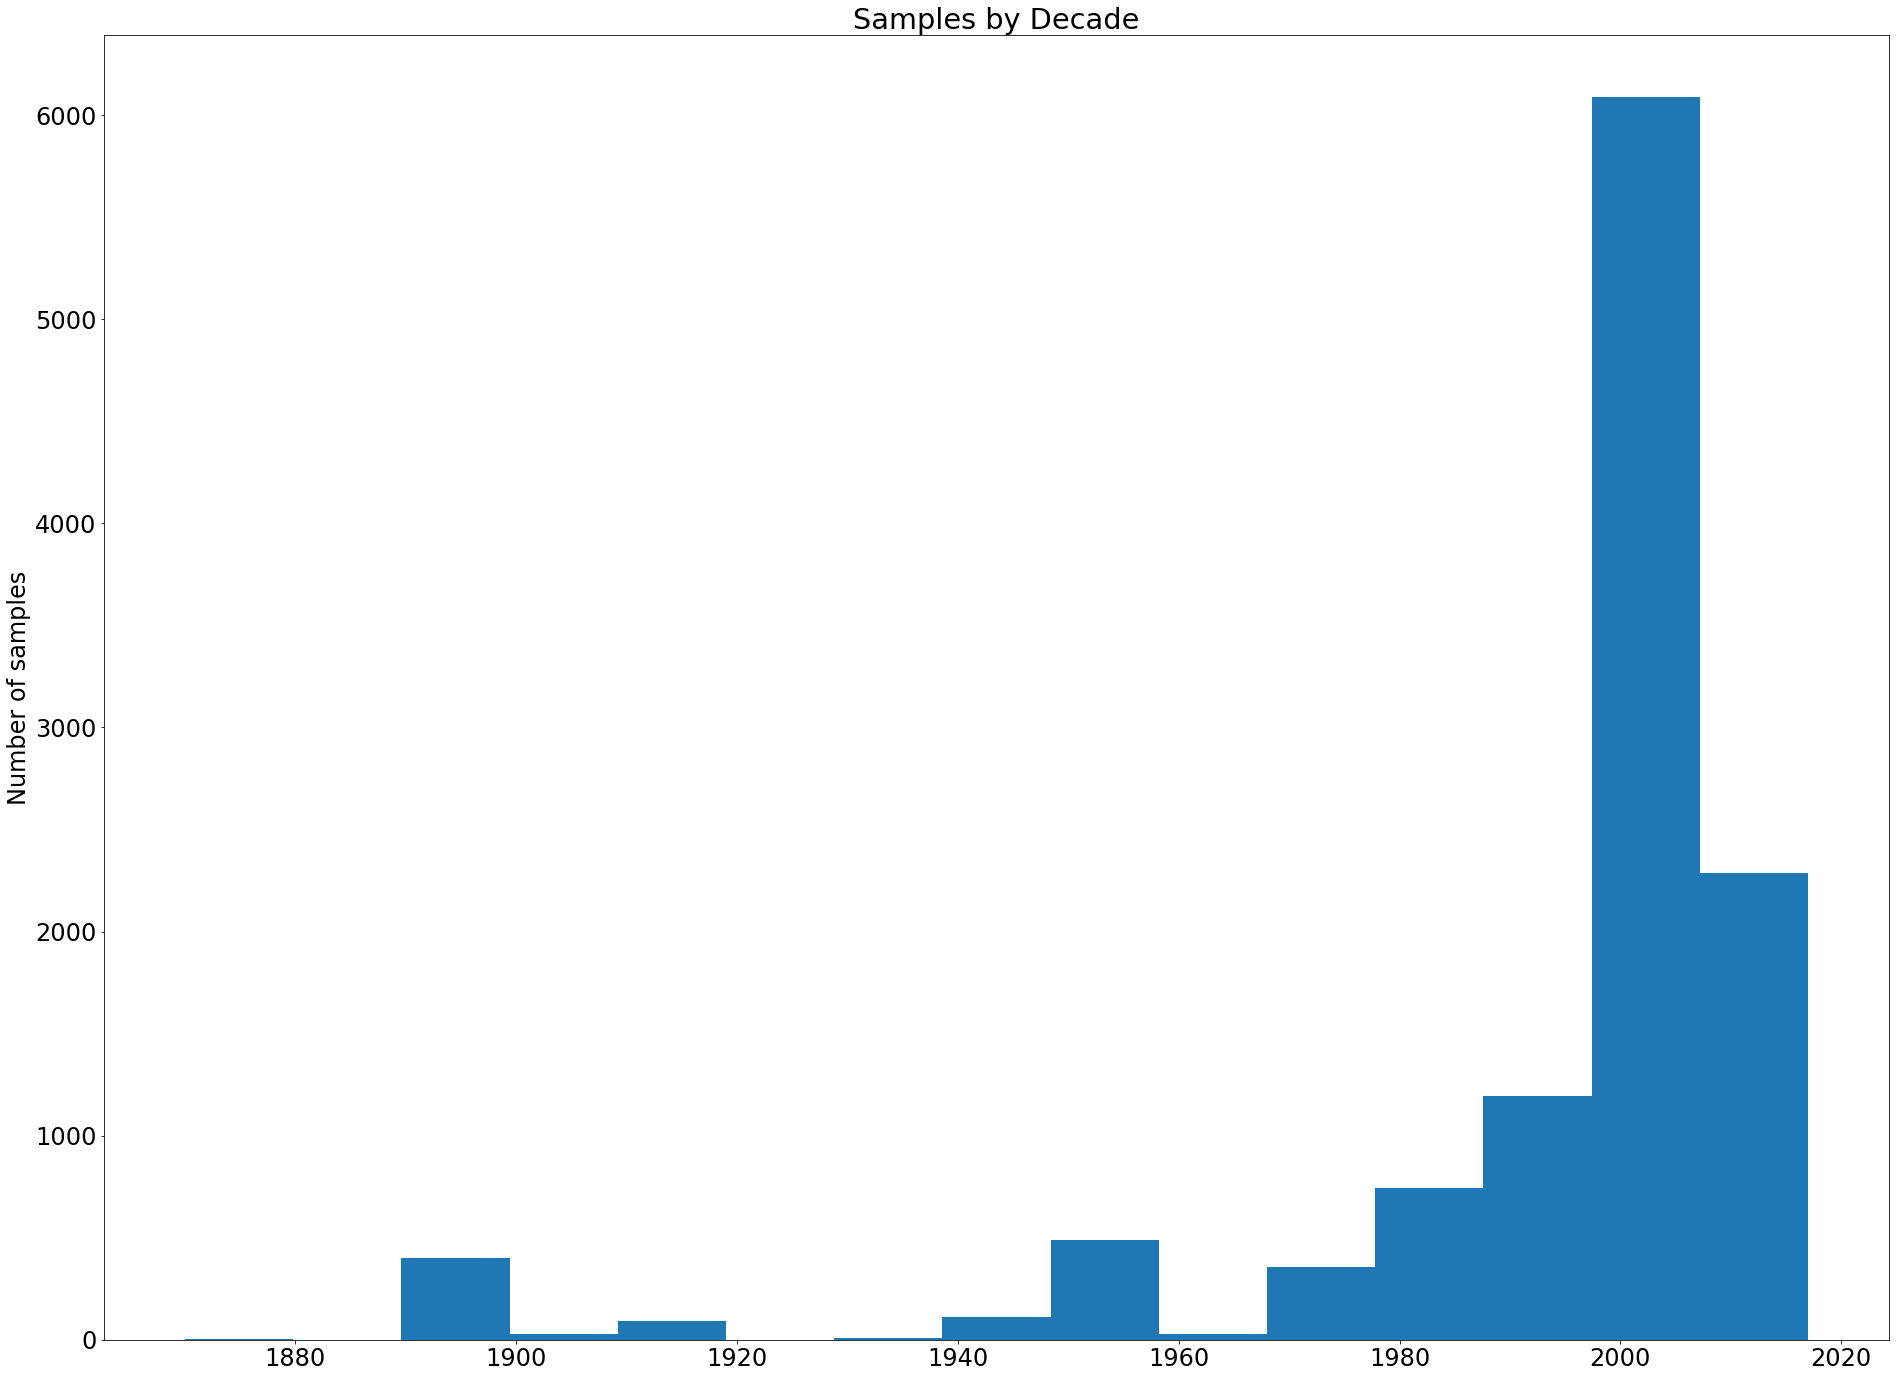

In [99]:
byYearAgg = sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])
byYearAgg = list(map(lambda x: [int(x[0])] * x[1], filter(lambda x: x[0] != '', byYear)))
flatList = [item for sublist in byYearAgg for item in sublist]

plt.hist(flatList, bins=15)
plt.gca().set(title='Samples by Decade', ylabel='Number of samples');

# Diversity by year

In [100]:
totalNumSpecies = len(Counter([i[4] for i in data[1:]]).items())
totalNumSpecies

3188

In [101]:
def getSpeciesAtYear(year):
    return Counter([x[4] for x in data if x[16] == year and x[16] != ''])

def getSpeciesAtAndBeforeYear(year):
    return Counter([x[4] for x in data if x[16]<=year and x[16] != ''])

### Species discovered up to a year

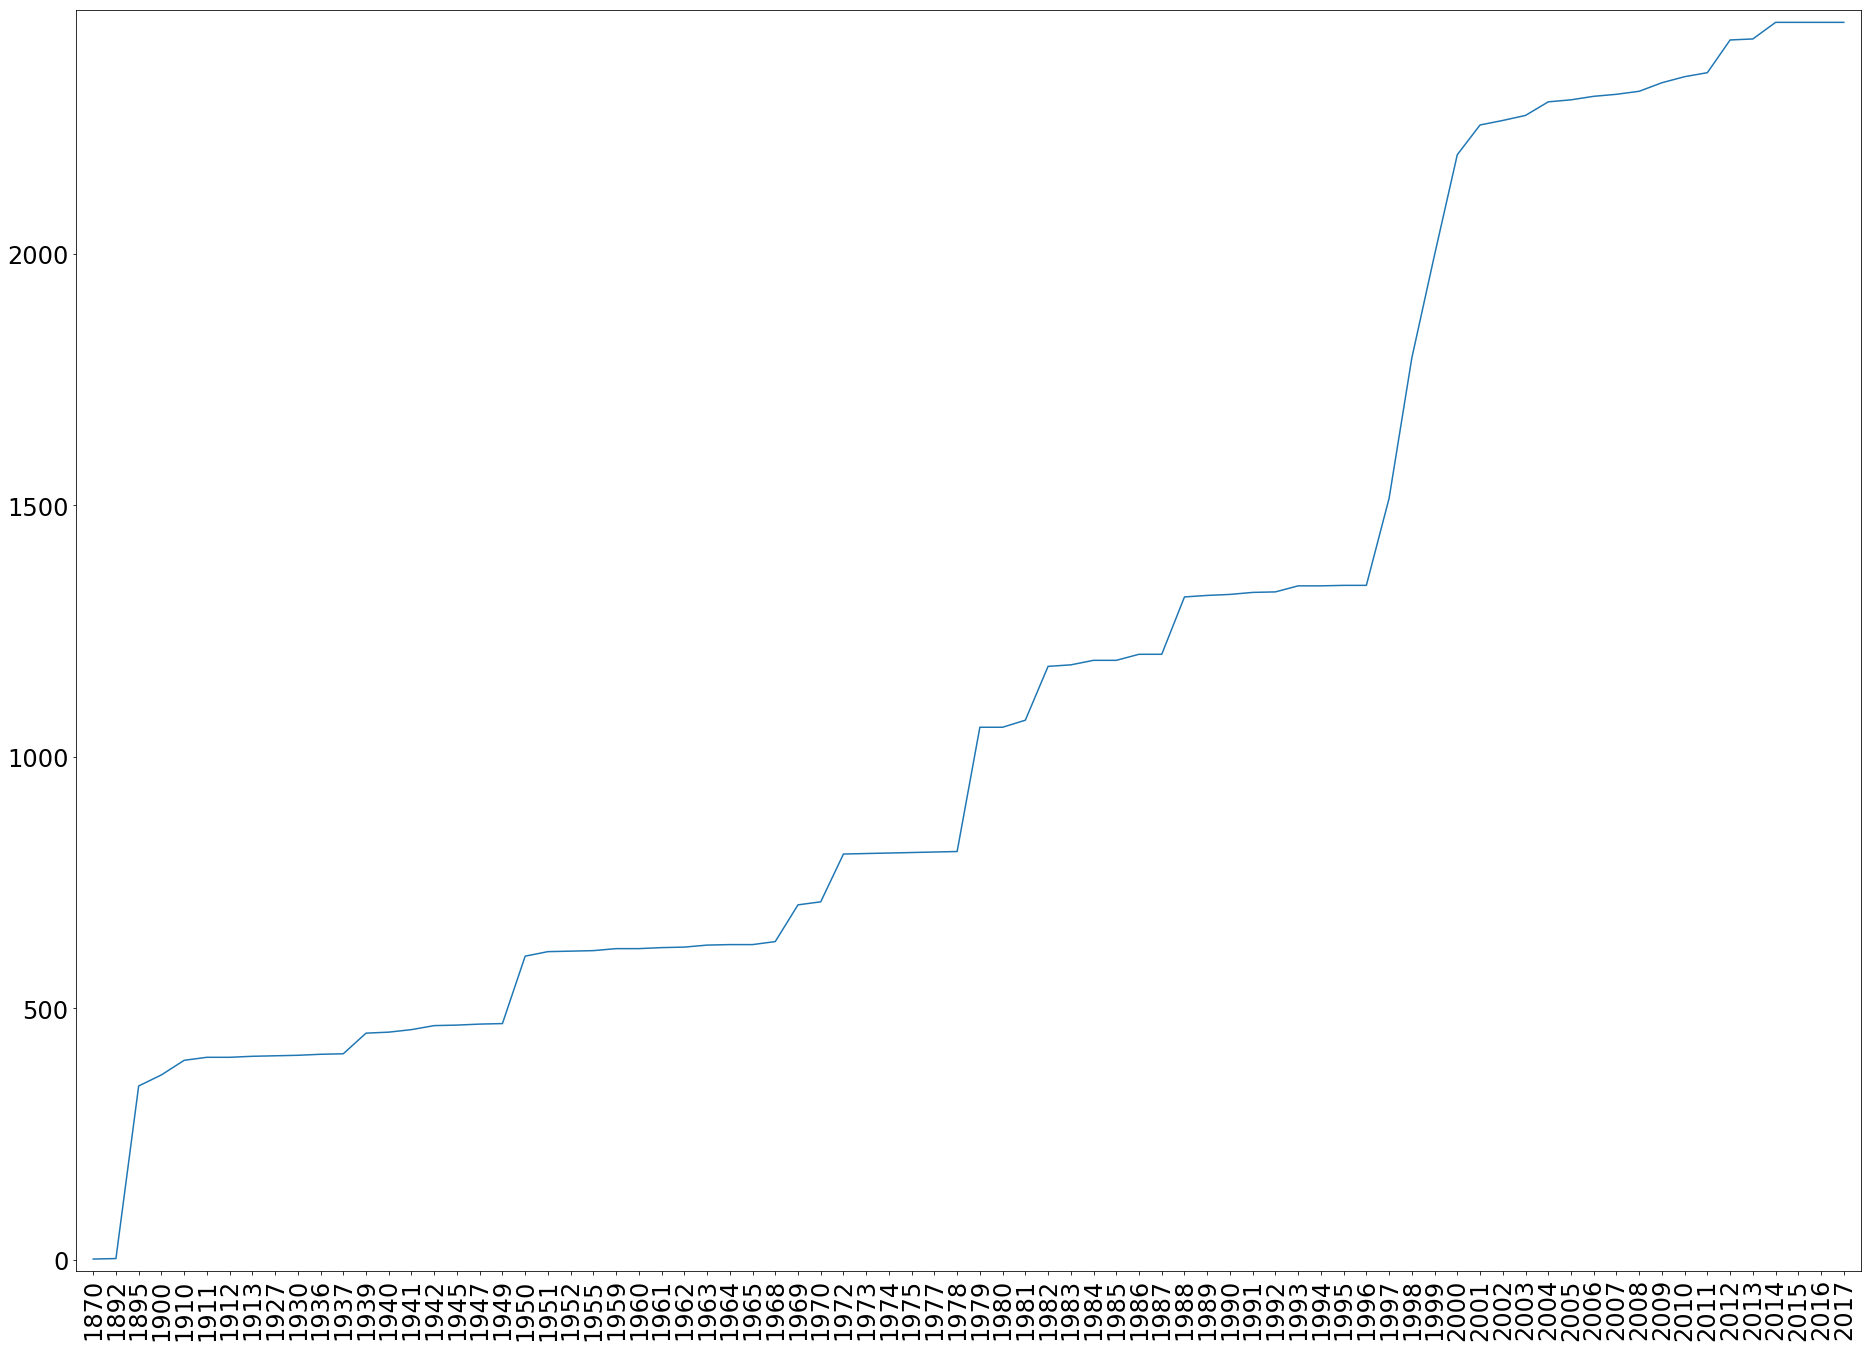

In [102]:
years = [x[0] for x in sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])[1:]]
numSpecies = list(map(lambda x: len(getSpeciesAtAndBeforeYear(x)), years))

plt.plot(years, numSpecies)
plt.xticks(years, rotation='vertical')
plt.margins(0.01)
plt.subplots_adjust(bottom=0.15)
plt.show()

### Number of unique species recorded by year

#### (May have been previously discovered)

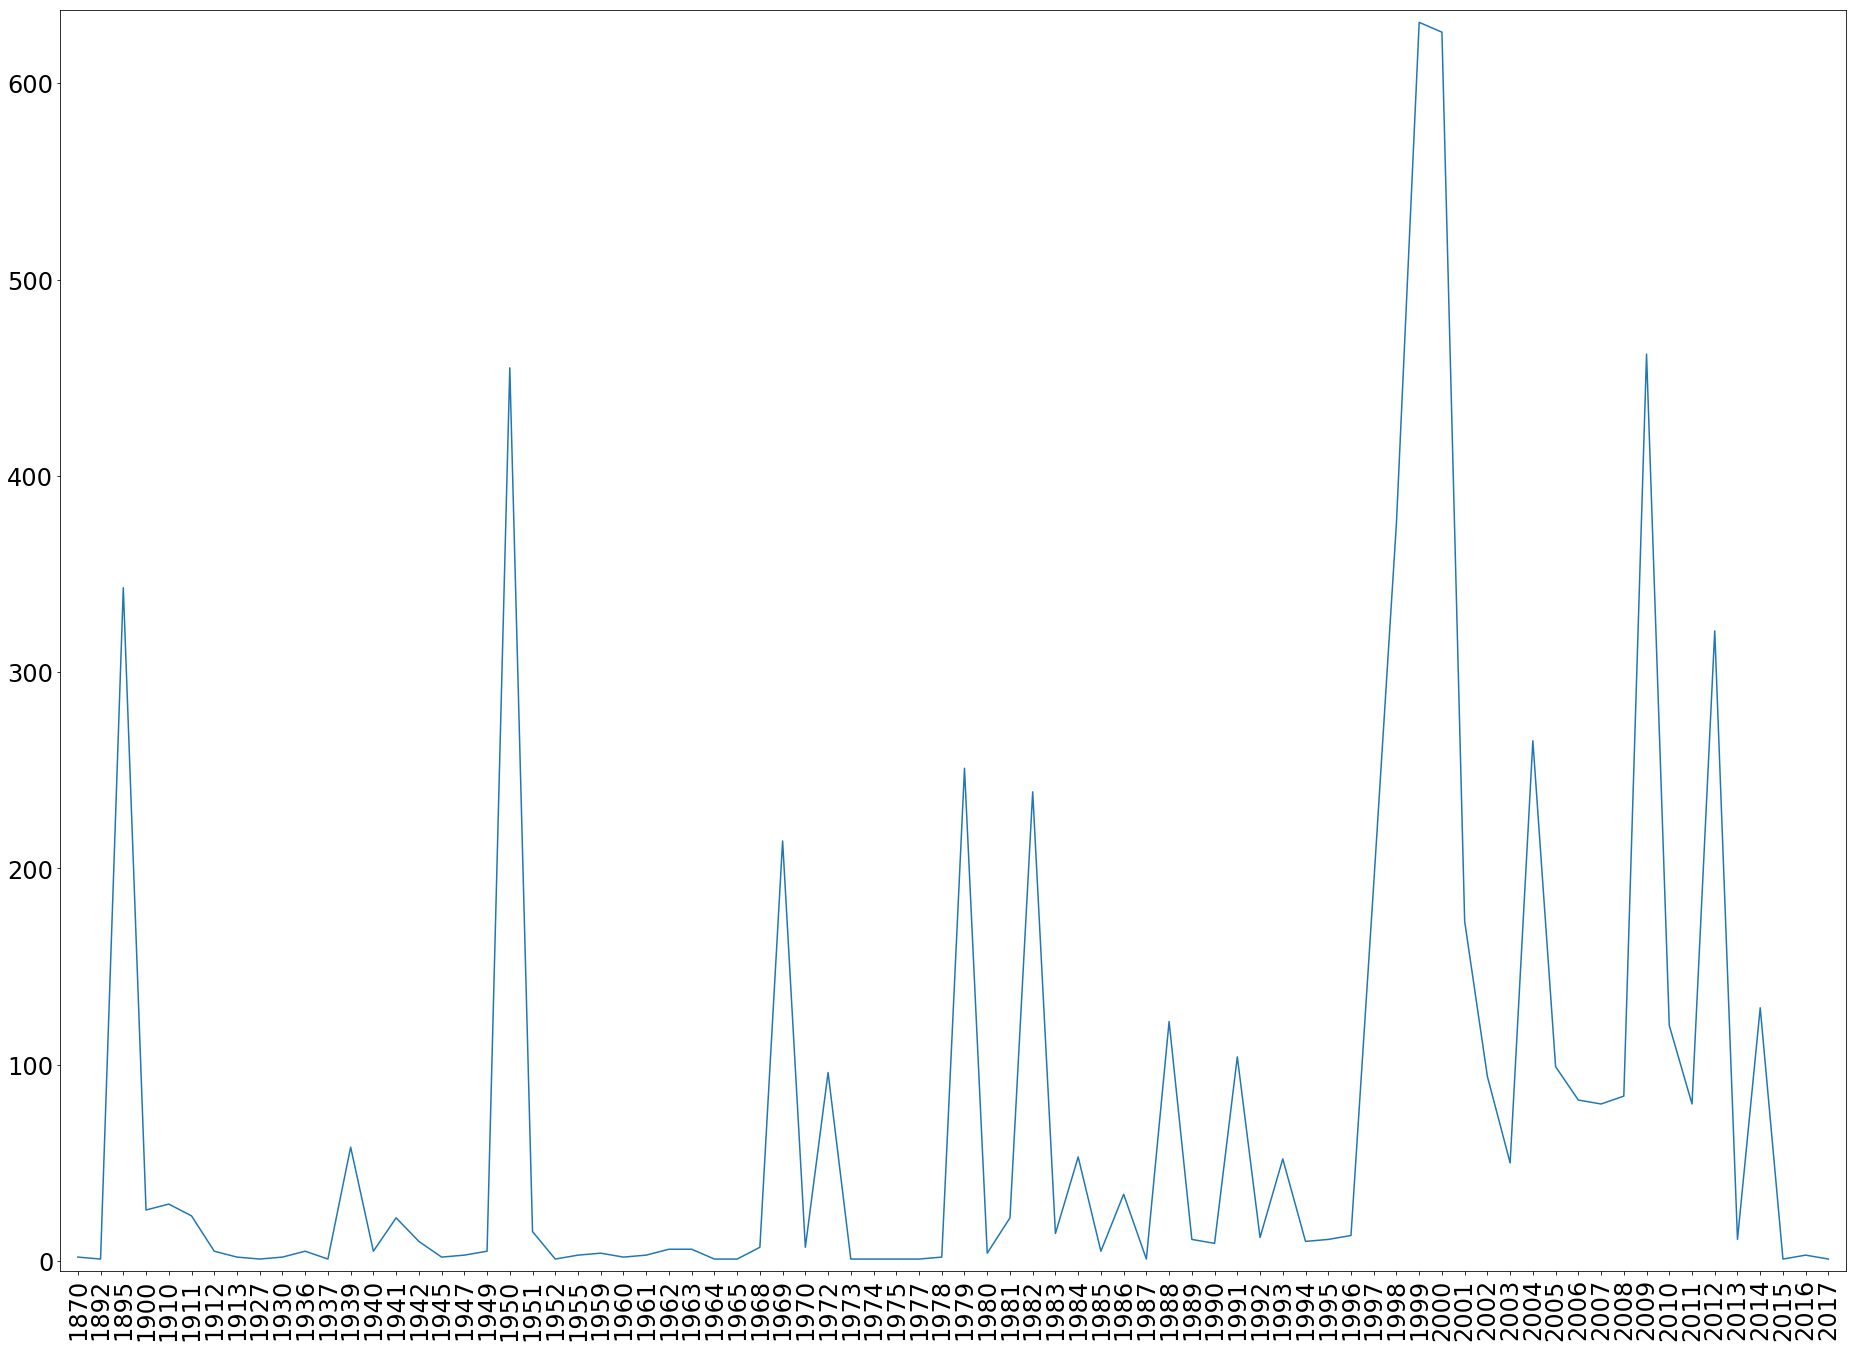

In [103]:
years = [x[0] for x in sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])[1:]]
numSpecies = list(map(lambda x: len(getSpeciesAtYear(x)), years))

plt.plot(years, numSpecies)
plt.xticks(years, rotation='vertical')
plt.margins(0.01)
plt.subplots_adjust(bottom=0.15)
plt.show()

# Number of observers (contributors) per year

### NOTE: we are removing any entries that belong to 'unknown' and that are not 'HumanObservation' (makes almost no difference for this second criteria)

### Interesting Observation: huge number of records in later years that are unknown collectors- play with the query function to see

In [117]:
recorders = [x[23] for x in data]
determiners = [x[24] for x in data]

recs = Counter(determiners)
dets = Counter(recorders)

print("Total number of recorders in time: " + str(len(recs.items())))
print("Total number of determiners in time: " + str(len(dets.items())))
print("Records with no recorders : " + str(recs['Unknown']))
print("Records with no determiners : " + str(dets['Unknown']))

obsTypes = [x[34] for x in data]
print(Counter(obsTypes))

Total number of recorders in time: 246
Total number of determiners in time: 443
Records with no recorders : 7
Records with no determiners : 69
Counter({'HumanObservation': 37378, 'PreservedSpecimen': 10, 'Basis of record': 1})


# 'SQL Query' 

In [118]:
def observersByYear(year):
    usingIndex = 23
    return Counter([x[usingIndex] for x in data if 
                        x[16] == year and x[16] != '' and 
                        x[34] == 'HumanObservation'  and 
                        (x[usingIndex]).lower() != 'unknown' and
                        x[usingIndex] != ''
                   ])

def observersByYearUnfiltered(year):
    usingIndex = 23
    return Counter([x[usingIndex] for x in data if 
                        x[16] == year and x[16] != ''  
                   ])

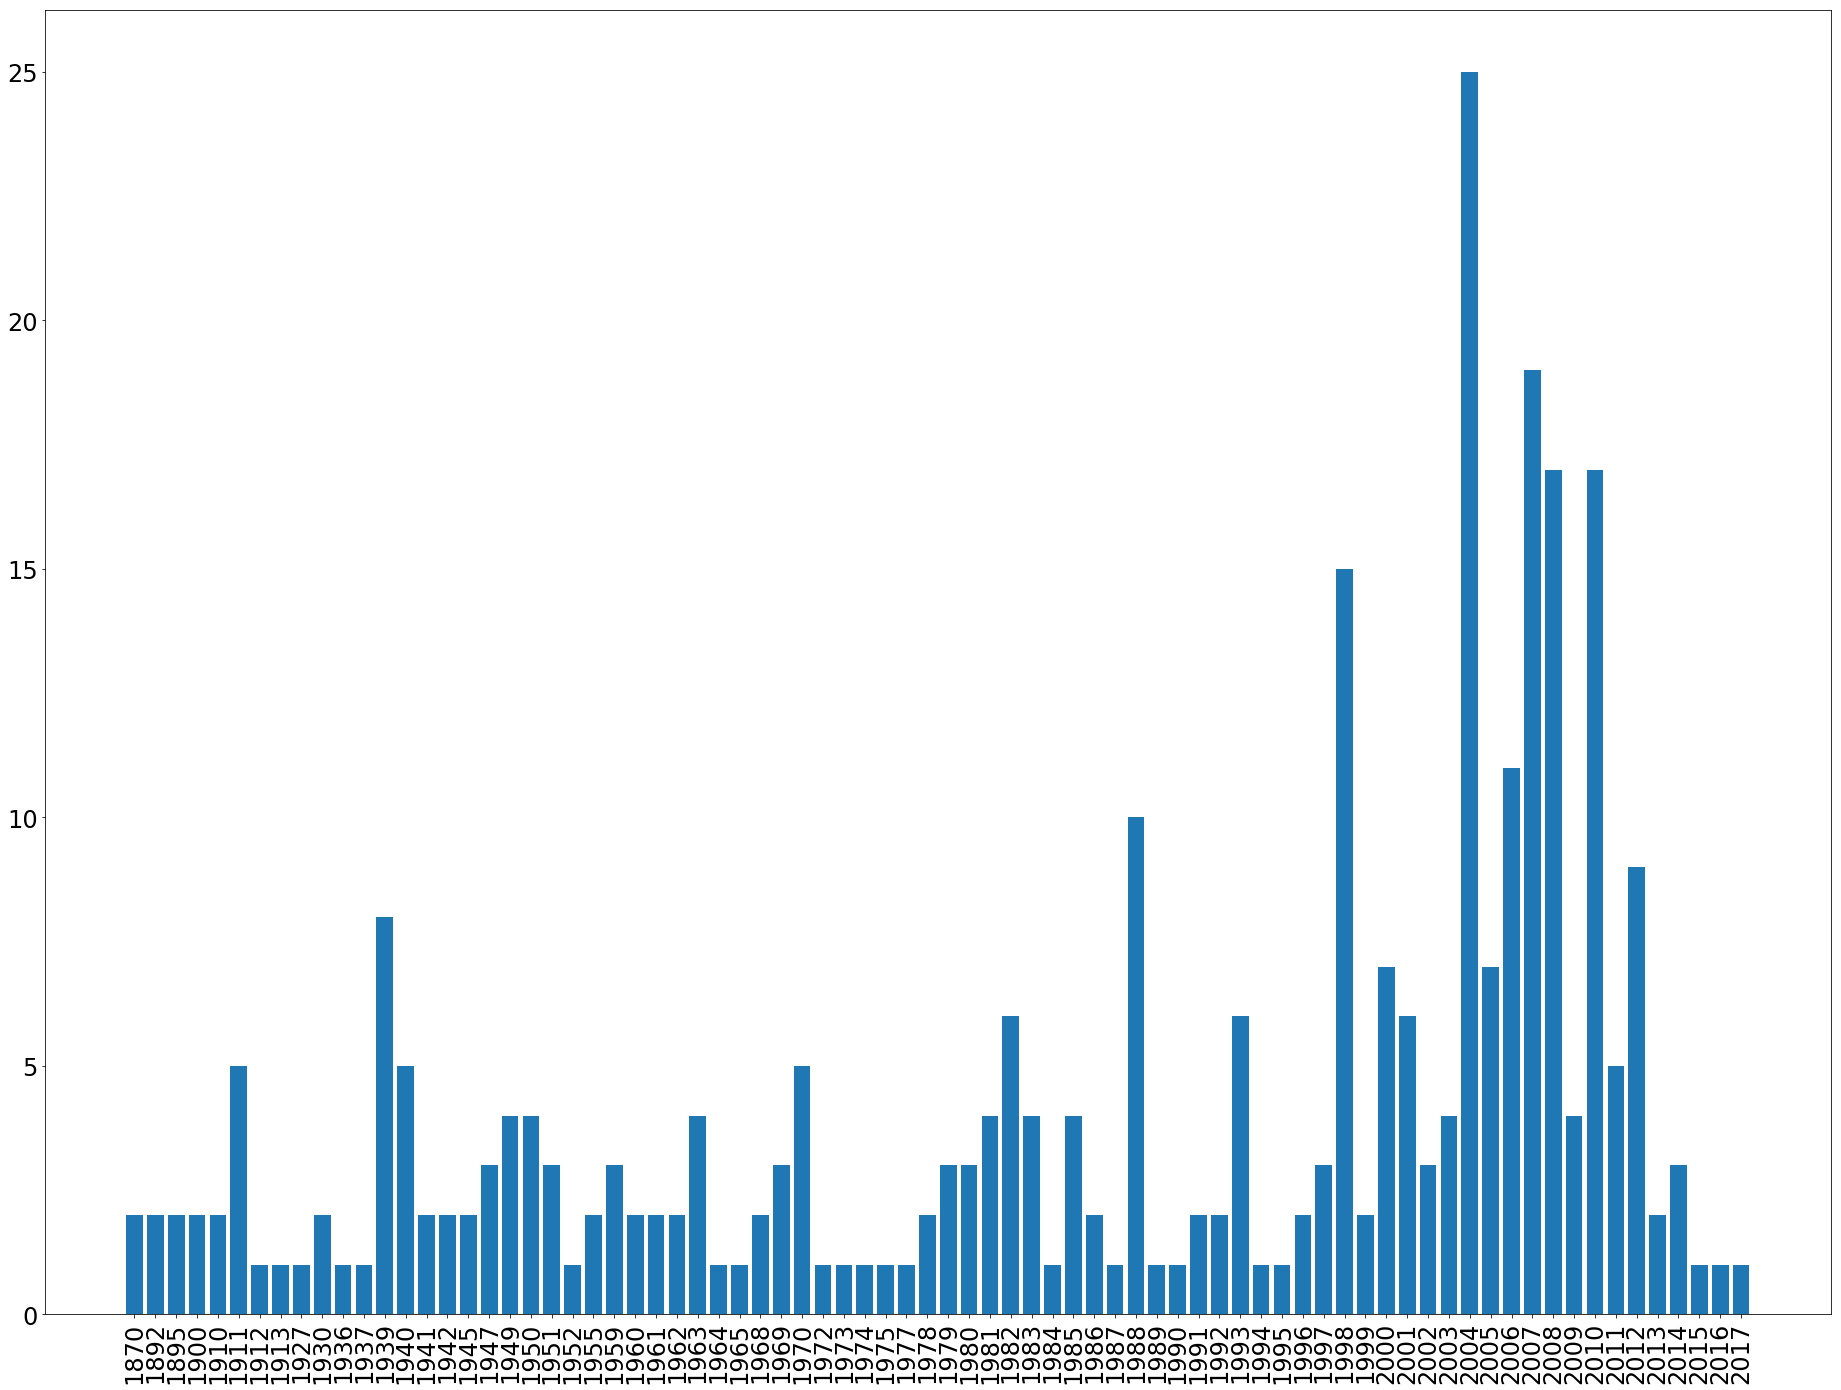

In [119]:
years = [x[0] for x in sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])[1:]]
numObserversByYear = list(map(lambda x: len(observersByYearUnfiltered(x).items()), years))

plt.bar(years, numObserversByYear)
plt.xticks(years, rotation='vertical')
plt.show()

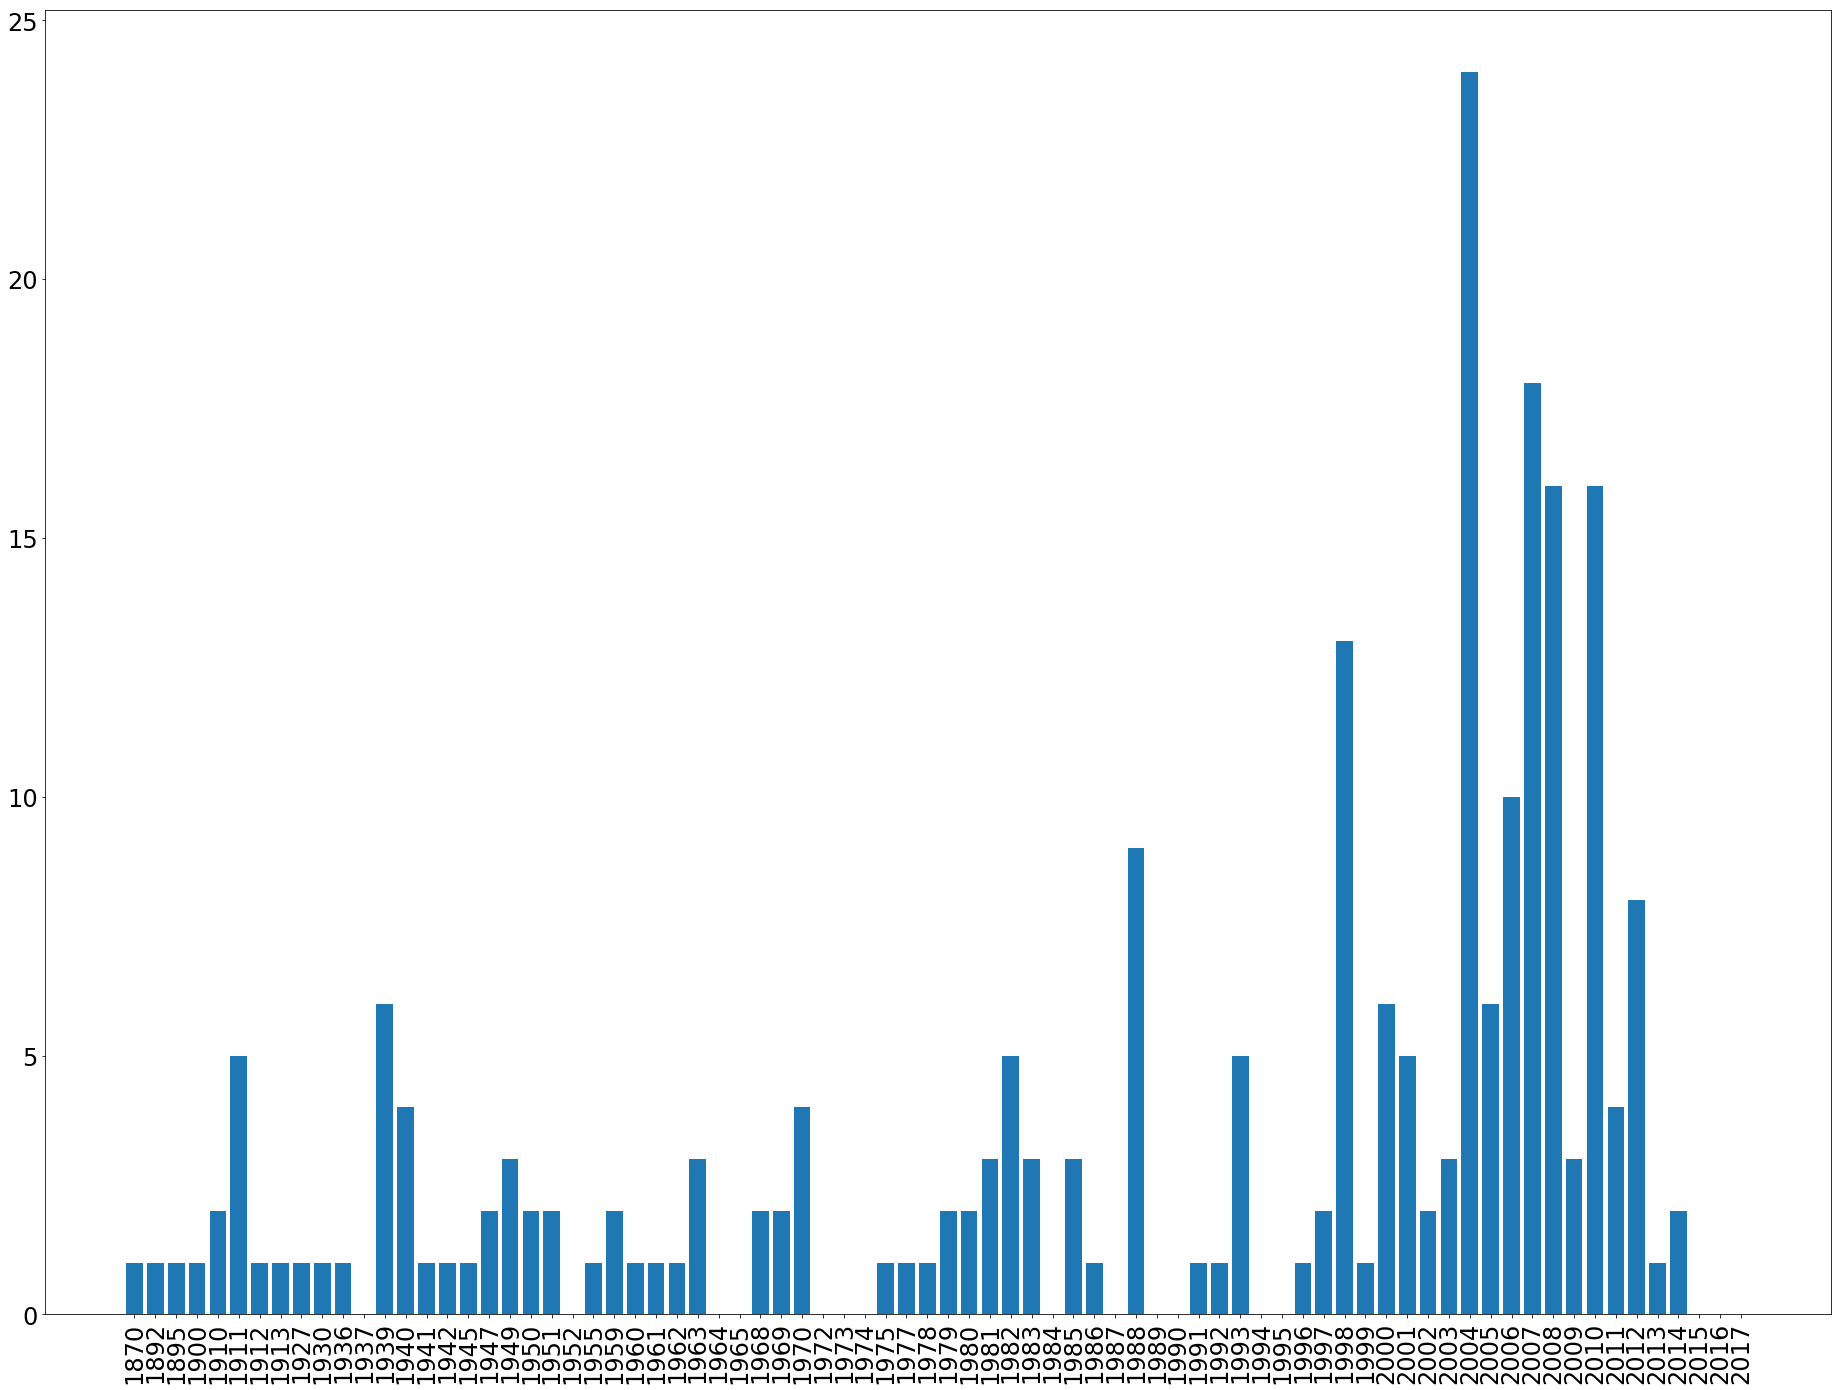

In [120]:
years = [x[0] for x in sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])[1:]]
numObserversByYear = list(map(lambda x: len(observersByYear(x).items()), years))

plt.bar(years, numObserversByYear)
plt.xticks(years, rotation='vertical')
plt.show()

### Normalised => Observations / Number of observers

In [126]:
def normalisedByObservers(year):
    entriesForYear = observersByYear(year)
    numEntries = sum(entriesForYear.values())
    numObservers = len(entriesForYear.items())
    if numObservers > 0:
        return numEntries / numObservers
    else:
        return 0
    
def normalisedByObserversUnfiltered(year):
    entriesForYear = observersByYearUnfiltered(year)
    numEntries = sum(entriesForYear.values())
    numObservers = len(entriesForYear.items())
    if numObservers > 0:
        return numEntries / numObservers
    else:
        return 0
print(normalisedByObservers('1870'))

1.0


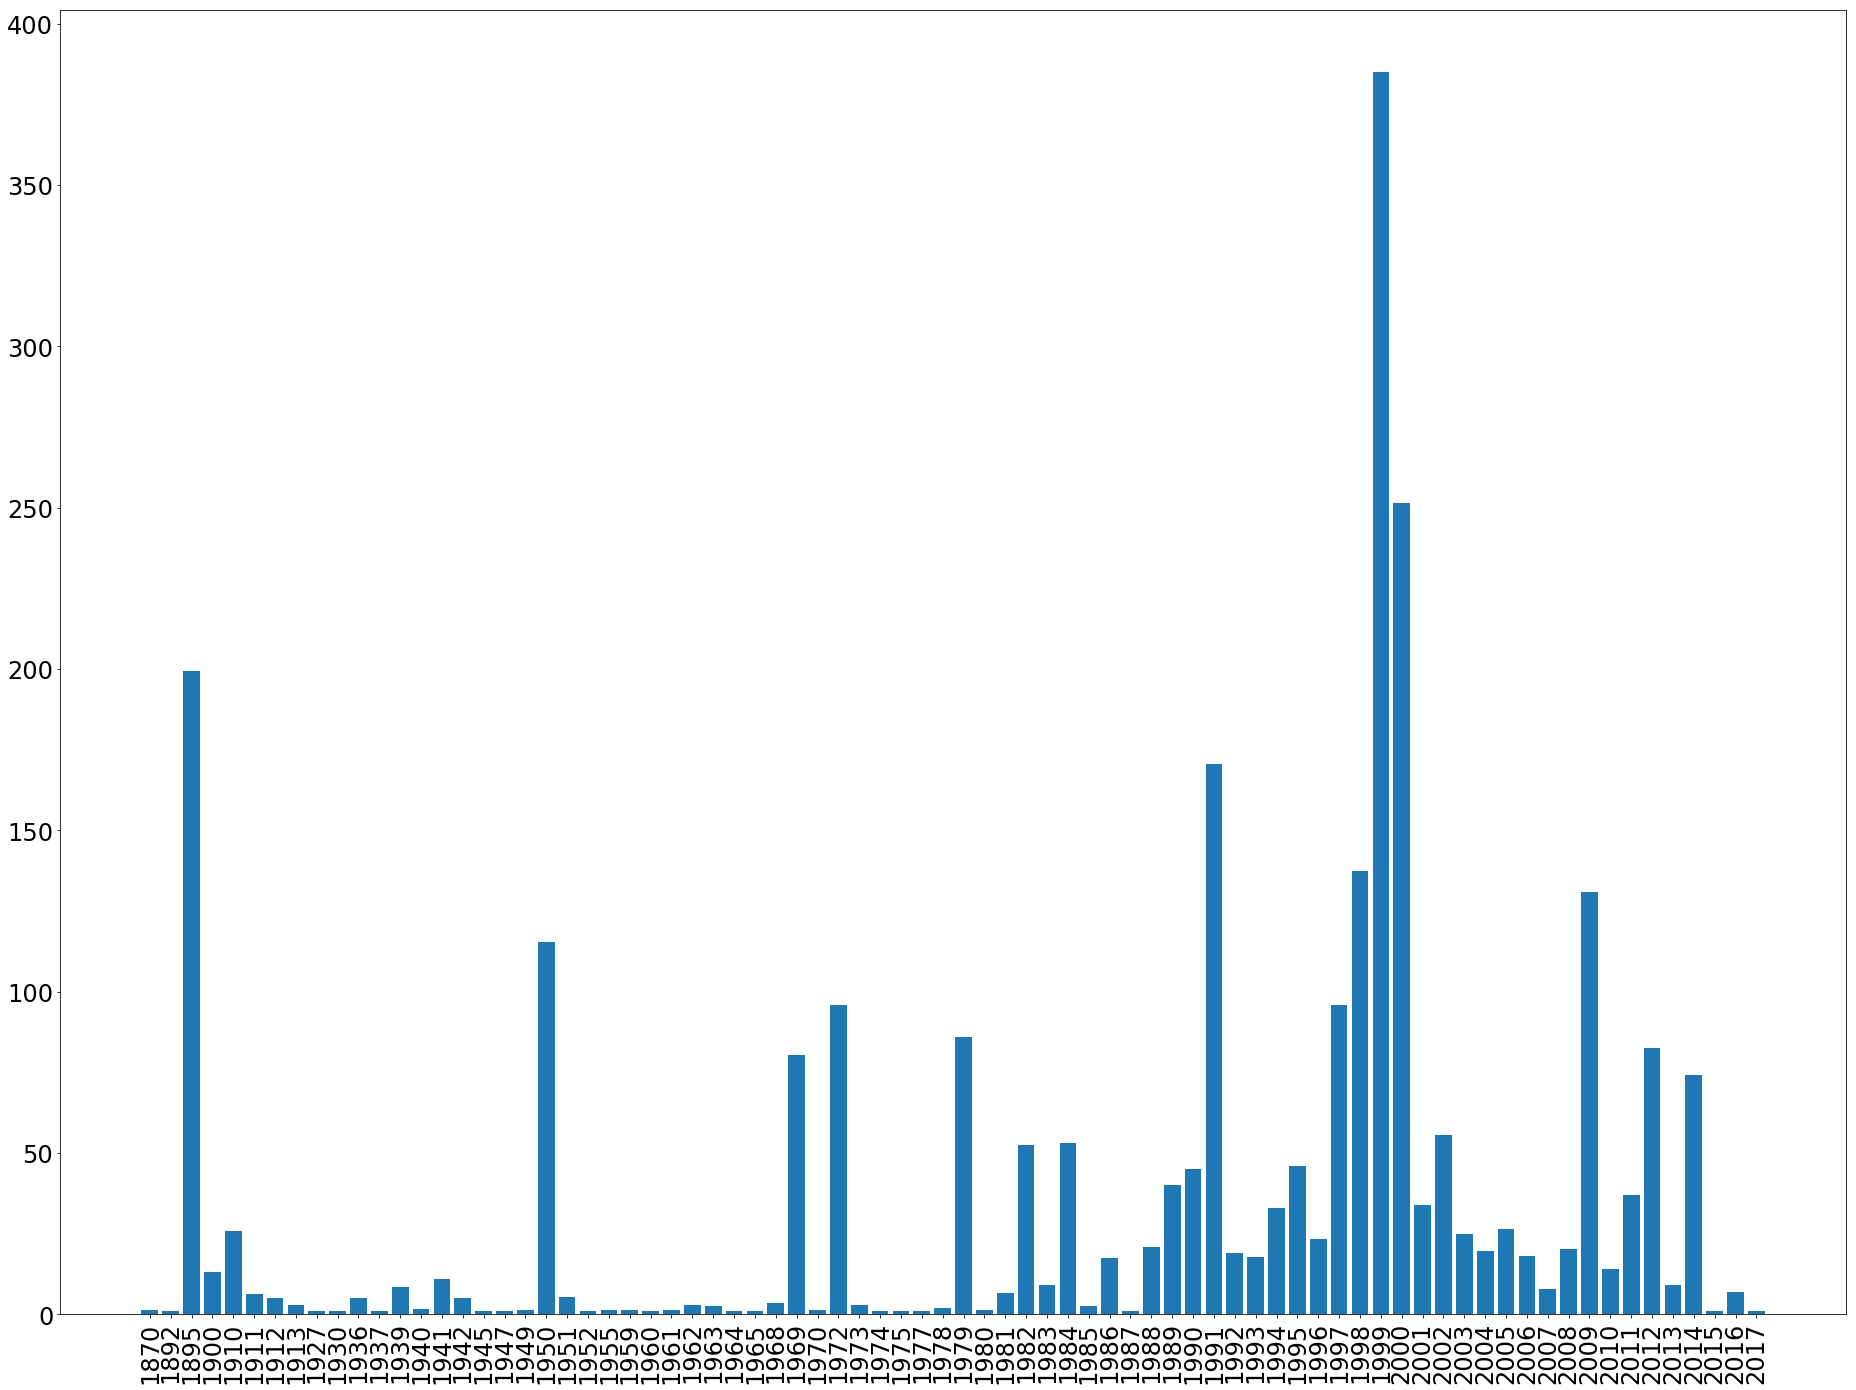

In [127]:
years = [x[0] for x in sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])[1:]]
numObserversByYear = list(map(lambda x: normalisedByObserversUnfiltered(x), years))

plt.bar(years, numObserversByYear)
plt.xticks(years, rotation='vertical')
plt.show()

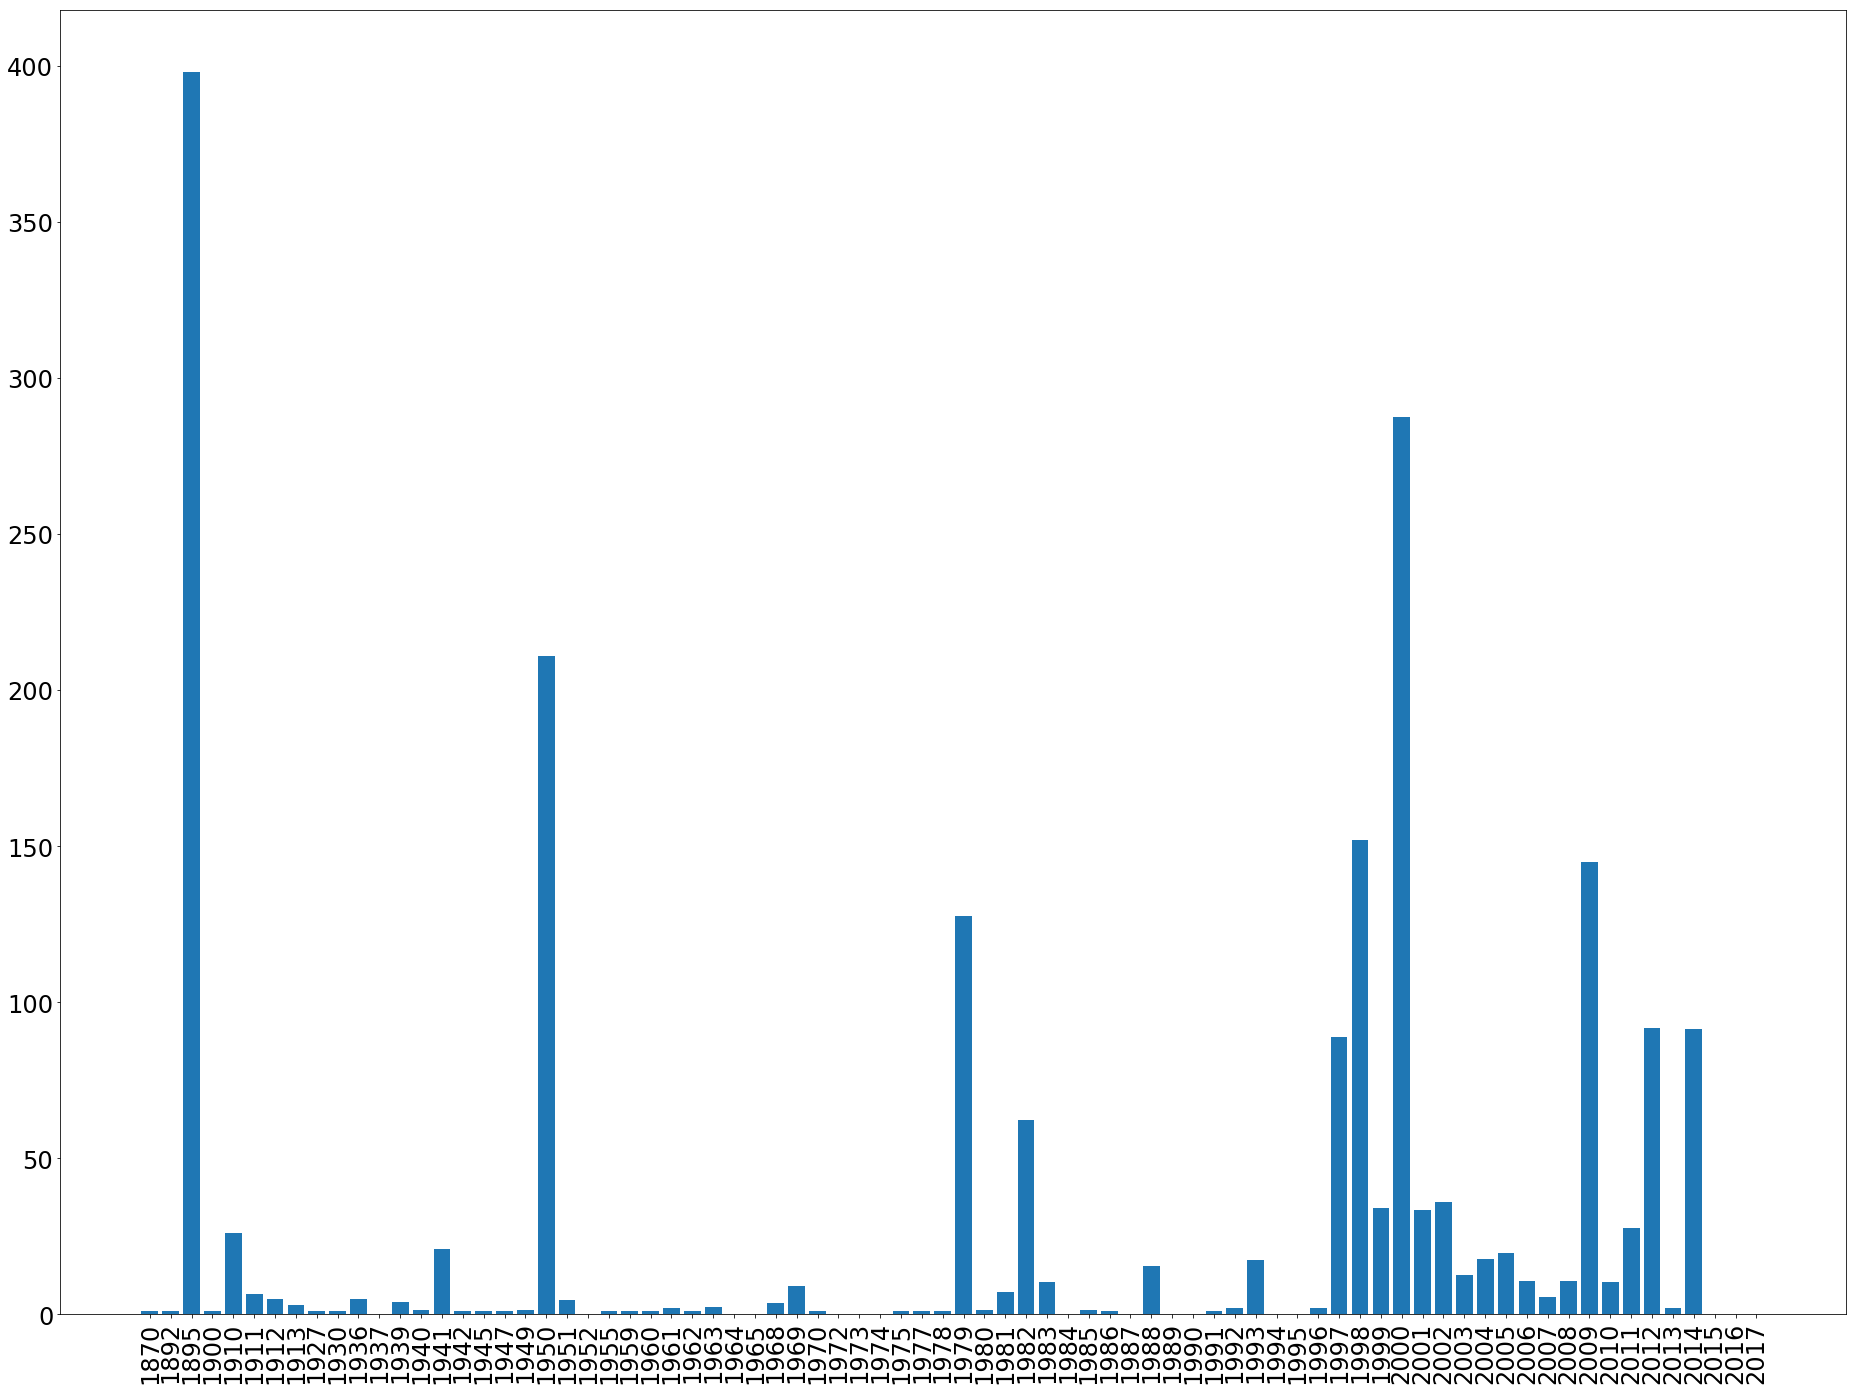

In [123]:
years = [x[0] for x in sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])[1:]]
numObserversByYear = list(map(lambda x: normalisedByObservers(x), years))

plt.bar(years, numObserversByYear)
plt.xticks(years, rotation='vertical')
plt.show()

# Changing PNG color

In [1]:
from PIL import Image 
import os

def newMarker(color, imageIndex):
    image = Image.open('markerOrg.png')
    pixelMap = image.load()
    newImg = Image.new(image.mode,image.size)
    pixelsNew = newImg.load() 
    width,height = newImg.size
    
    h = color.lstrip('#')
    color = tuple(int(h[i:i+2], 16) for i in (0, 2, 4))
    color = color + (255,)
    
    for i in range(width): 
        for j in range(height):
            pixelsNew[i,j] = pixelMap[i,j]
            if pixelMap[i,j][3] < 250:
                pixelsNew[i,j] = (255,255,255,255)
            elif pixelMap[i,j][0] < 255:
                pixelsNew[i,j] = color
    newImg.save( r"C:\Users\davie\Desktop\Masters' year\Dissertation\Code\SpeciesPlot\SpeciesPlot\markertmp.png", 'png')

    img = Image.open('markertmp.png')
    img = img.convert("RGBA")
    datas = img.getdata()

    newData = []
    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)

    img.putdata(newData)
    img.save("marker"+str(imageIndex)+".png", "PNG")
    os.remove("markertmp.png")

In [2]:
def generateNMarkers(n):
    jump = int(14777216 / n)
    offset = 2000000
    for i in range(0, n):
        hexidec = '#{0:06x}'.format(int(i * jump))
        newMarker(hexidec, i)

#generateNMarkers(78)

In [10]:
from PIL import Image 
import os
import math

def redToBlue(n):
    buildArray = []
    lowRange = 255
    highRange = 255
    
    redNum = int(math.floor(n / 2))
    blueNum = int(math.ceil(n / 2))
    
    currentRed = 0
    redStep = int(lowRange / redNum)
    for i in range(0, redNum):
        color = currentRed * redStep
        hexidec = '#%02x%02x%02x' % (255, 0, color)
        buildArray.append(hexidec)
        currentRed += 1
    
    temp = []
    currentBlue = 0
    blueStep = int(lowRange / blueNum)
    for i in range(0, redNum):
        color = currentBlue * blueStep
        hexidec = '#%02x%02x%02x' % (color, 0, 255)
        temp.append(hexidec)
        currentBlue += 1
    
    temp = temp[::-1] #reverse the blue colours- they go in the opposite order
    buildArray.extend(temp)
    return buildArray
    

In [11]:
def generateColorMapMarkers(n):
    colorMap = redToBlue(n)
    
    for k,i in enumerate(colorMap):
        newMarker(i, k)
generateColorMapMarkers(78)